In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import warnings

warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv('waterQuality1.csv')  # Replace with your actual file path
print("Initial Data Sample:")
print(df.head())

Initial Data Sample:
   aluminium ammonia  arsenic  barium  cadmium  chloramine  chromium  copper  \
0       1.65    9.08     0.04    2.85    0.007        0.35      0.83    0.17   
1       2.32   21.16     0.01    3.31    0.002        5.28      0.68    0.66   
2       1.01   14.02     0.04    0.58    0.008        4.24      0.53    0.02   
3       1.36   11.33     0.04    2.96    0.001        7.23      0.03    1.66   
4       0.92   24.33     0.03    0.20    0.006        2.67      0.69    0.57   

   flouride  bacteria  ...   lead  nitrates  nitrites  mercury  perchlorate  \
0      0.05      0.20  ...  0.054     16.08      1.13    0.007        37.75   
1      0.90      0.65  ...  0.100      2.01      1.93    0.003        32.26   
2      0.99      0.05  ...  0.078     14.16      1.11    0.006        50.28   
3      1.08      0.71  ...  0.016      1.41      1.29    0.004         9.12   
4      0.61      0.13  ...  0.117      6.74      1.11    0.003        16.90   

   radium  selenium  si

In [7]:
# Step 1.5: Clean non-numeric values like '#NUM!'
df.replace('#NUM!', np.nan, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')  # Convert all to numeric, force errors to NaN



Missing Values per Column:
 aluminium      0
ammonia        3
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        3
dtype: int64


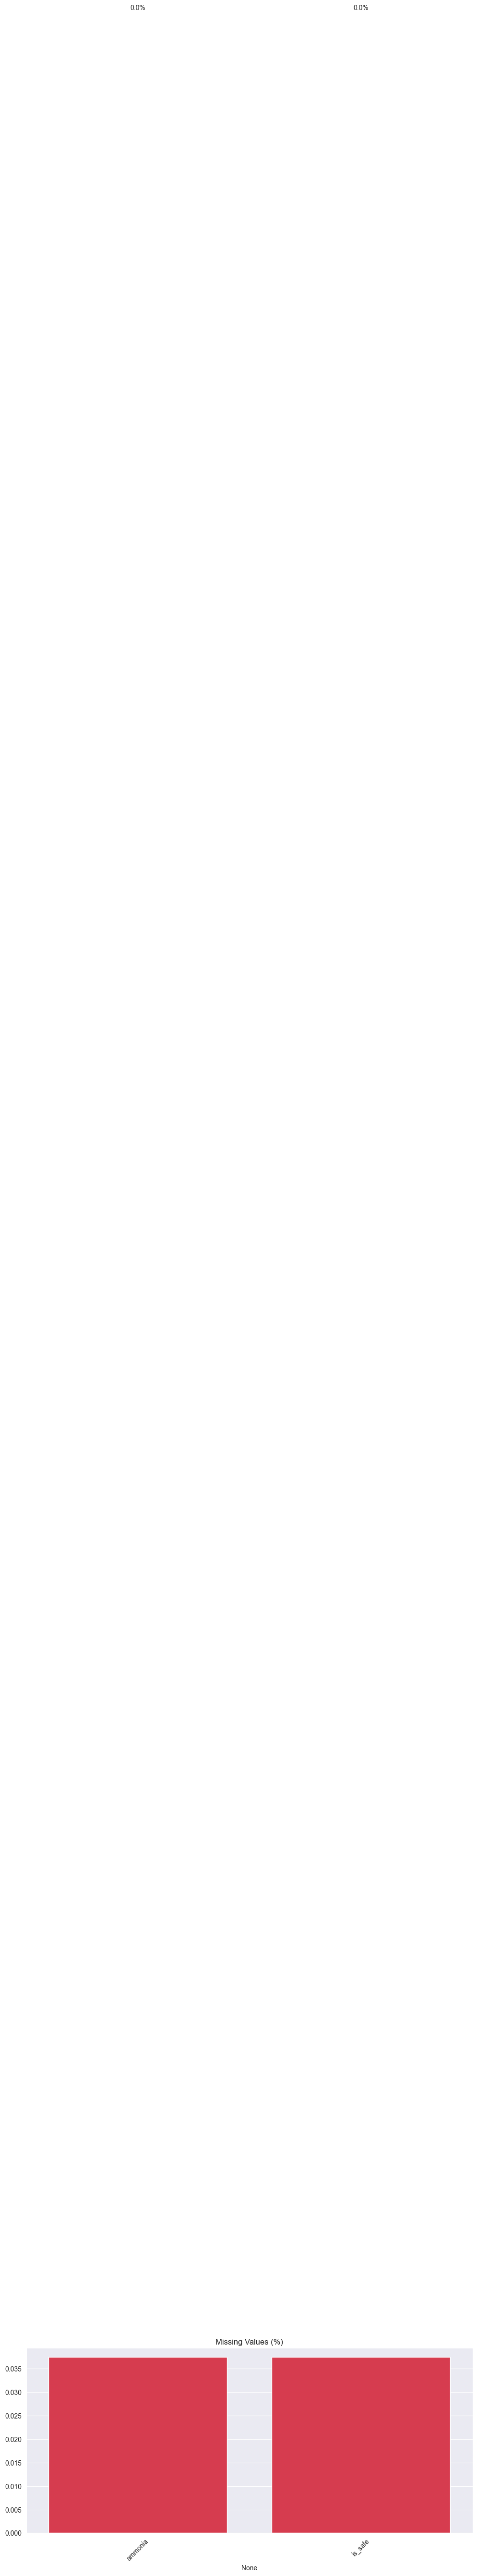

In [10]:
print("\nMissing Values per Column:\n", df.isnull().sum())

# Visualize missing data if any
missing_pct = df.isnull().mean() * 100
missing_pct = missing_pct[missing_pct > 0]

if not missing_pct.empty:
    plt.figure(figsize=(12, 5))
    sns.barplot(x=missing_pct.index, y=missing_pct.values, color='#ef233c')
    plt.title('Missing Values (%)')
    plt.xticks(rotation=45)
    for i, v in enumerate(missing_pct.values):
        plt.text(i, v + 0.5, f'{v:.1f}%', ha='center')
    plt.tight_layout()
    plt.show()

In [12]:
# Split features and target
X = df.drop('is_safe', axis=1)
y = df['is_safe']

# Replace nulls in target with 0
y.fillna(0, inplace=True)

# Replace nulls in features with 0
X.fillna(0, inplace=True)


In [13]:
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [95]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


In [98]:
joblib.dump(model, 'Main-water_quality_model.pkl')
joblib.dump(scaler, 'Main-scaler.pkl')
print("Model and scaler saved successfully.")

Model and scaler saved successfully.


In [4]:
import joblib

model = joblib.load('Main-water_quality_model.pkl')
scaler = joblib.load('Main-scaler.pkl')

# Replace with actual values: [aluminium, ammonia, arsenic, ..., uranium]
sample = [[0.8, 0.05, 0.1, 2.0, 0.05, 3.5, 0.1, 0.9, 2.0, 0.0, 0.0, 0.1, 20, 2.5, 0.05, 0.03, 0.04, 0.5, 0.1, 0.2]]


scaled_sample = scaler.transform(sample)
prediction = model.predict(sample)
print(f"prediction: {prediction}")
print("Prediction:", "Safe to drink" if prediction[0] == 1 else "Not safe to drink")


prediction: [0.]
Prediction: Not safe to drink


In [5]:
samples = [[0.01, 0.02, 0.001, 0.05, 0.0001, 2.5, 0.01, 0.05, 0.7, 0.0, 0.0, 0.002, 10, 1, 0.001, 0.002, 0.003, 0.01, 0.005, 0.001],
           [0.8, 0.05, 0.1, 2.0, 0.05, 3.5, 0.1, 0.9, 2.0, 0.0, 0.0, 0.1, 20, 2.5, 0.05, 0.03, 0.04, 0.5, 0.1, 0.2],
           [0.02, 0.03, 0.002, 0.1, 0.0002, 3.0, 0.02, 0.1, 0.9, 500, 300, 0.001, 5, 0.5, 0.001, 0.001, 0.001, 0.01, 0.001, 0.001],
           [0.5, 1.0, 0.05, 5.0, 0.02, 4.0, 0.05, 1.0, 1.5, 0.0, 0.0, 0.05, 50, 3, 0.02, 0.01, 0.03, 0.05, 0.05, 0.05],
        [0.2, 0.3, 0.01, 1.0, 0.005, 3.0, 0.03, 0.3, 1.0, 1.0, 1.0, 0.01, 25, 1.5, 0.005, 0.005, 0.01, 0.02, 0.02, 0.01]
]

for sample in samples:
    scaled_sample = scaler.transform([sample])
    prediction = model.predict(scaled_sample)
    print(f"prediction: {prediction}")
    print("Prediction:", "Safe" if prediction[0] == 1 else "Not Safe")

prediction: [1.]
Prediction: Safe
prediction: [0.]
Prediction: Not Safe
prediction: [0.]
Prediction: Not Safe
prediction: [0.]
Prediction: Not Safe
prediction: [1.]
Prediction: Safe


Accuracy:  0.96
Precision: 0.93
Recall:    0.67
F1-Score:  0.78


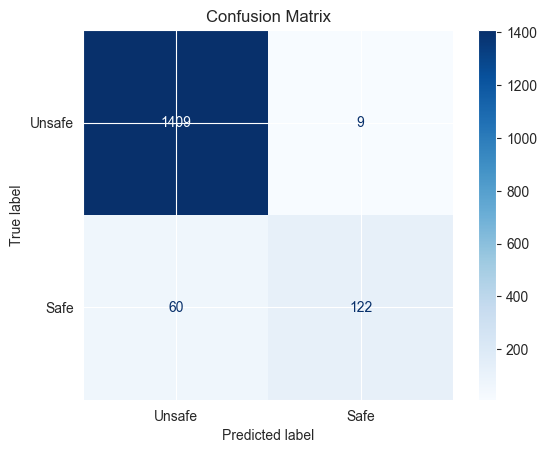

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Predict using the model
y_pred = model.predict(X_test)

# Calculate Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print Metrics
print(f"Accuracy:  {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1-Score:  {f1:.2f}")

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Unsafe", "Safe"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


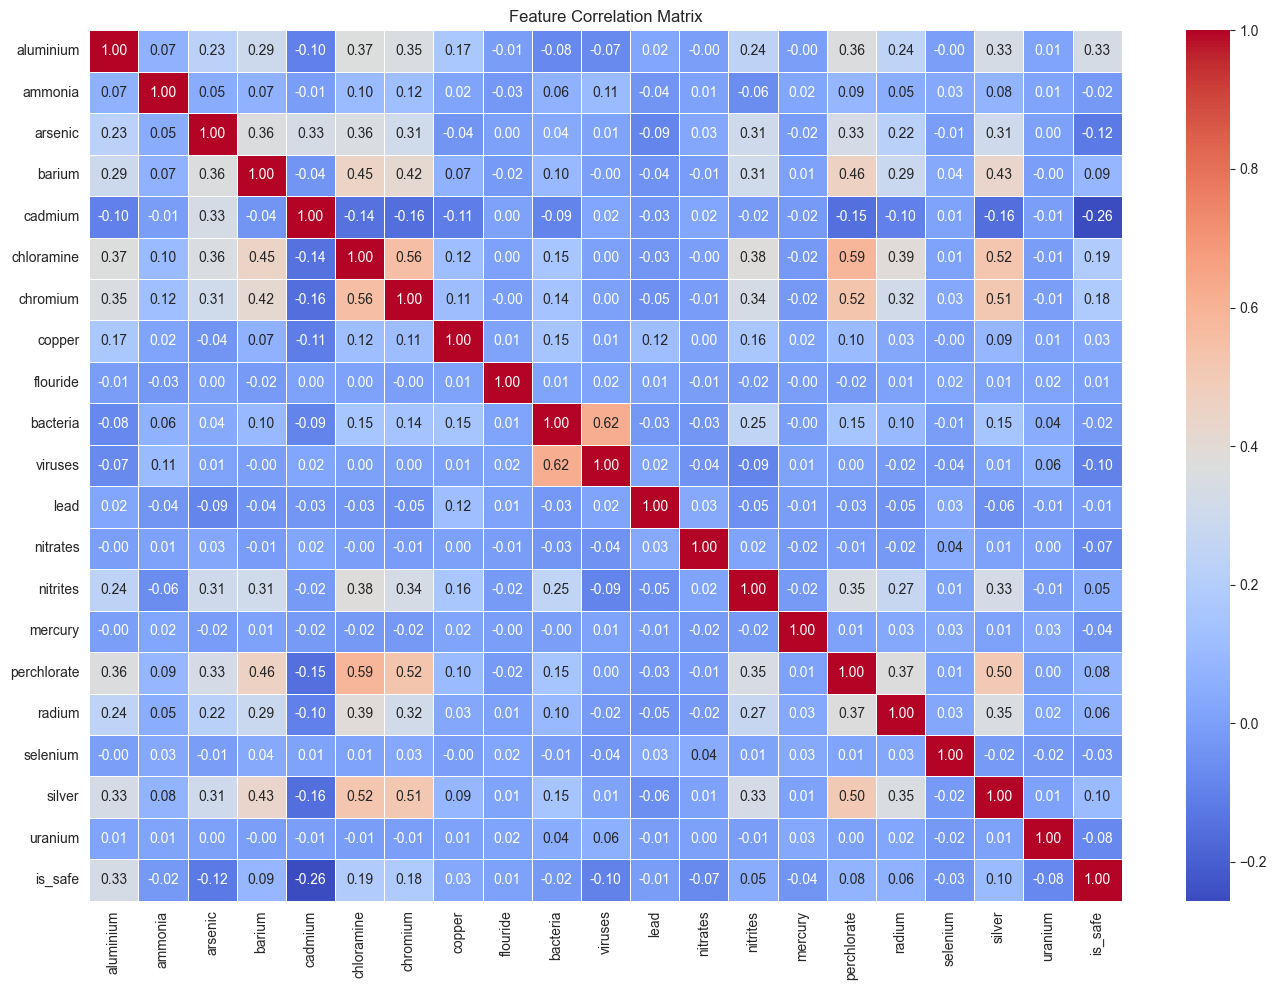

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
plt.figure(figsize=(14, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()


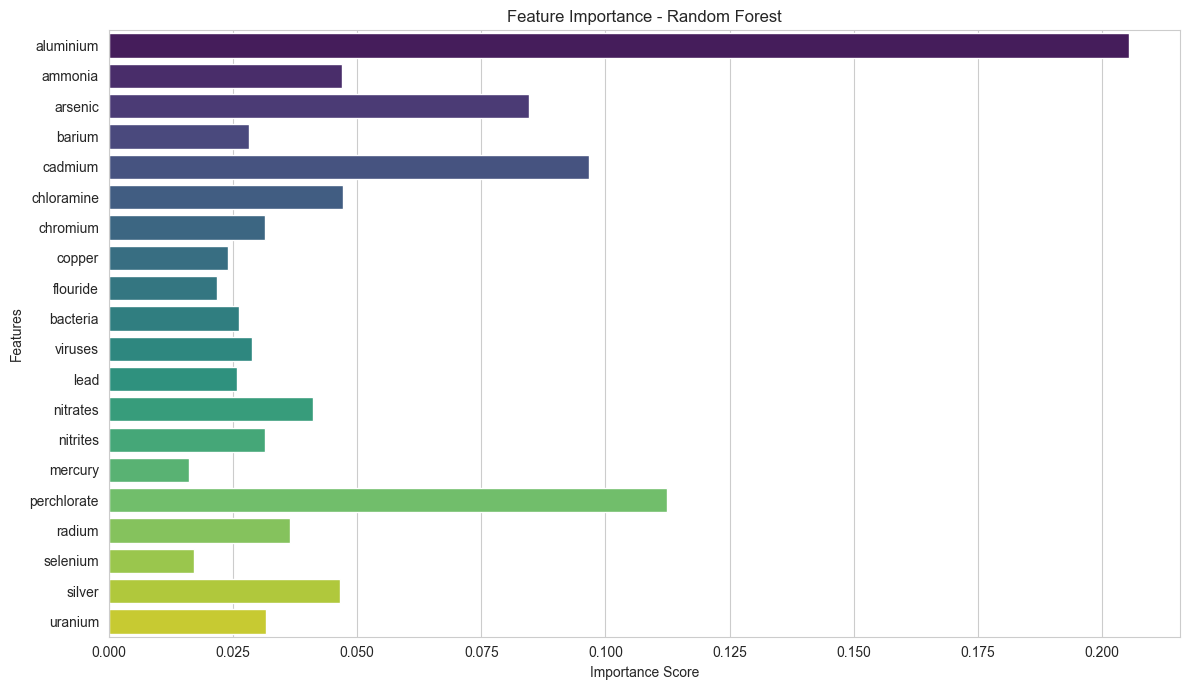

In [19]:
importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(12, 7))
sns.barplot(x=importances, y=feature_names, palette='viridis')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


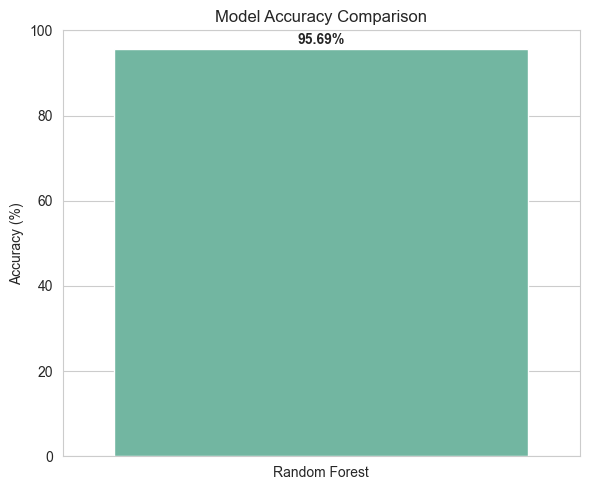

In [21]:
models = ['Random Forest']
accuracies = [accuracy_score(y_test, y_pred) * 100]

plt.figure(figsize=(6, 5))
sns.barplot(x=models, y=accuracies, palette='Set2')
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison")
for i, v in enumerate(accuracies):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', fontweight='bold')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()
